In [26]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline

In [27]:
data_path = "C:\\Users\\Mvideo\\mlda\\lab_05_12\\swiggy.csv"
data = pd.read_csv(data_path)
data.head(10)

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
0,211,Koramangala,Bangalore,Tandoor Hut,300.0,4.4,100,"Biryani,Chinese,North Indian,South Indian",5Th Block,59
1,221,Koramangala,Bangalore,Tunday Kababi,300.0,4.1,100,"Mughlai,Lucknowi",5Th Block,56
2,246,Jogupalya,Bangalore,Kim Lee,650.0,4.4,100,Chinese,Double Road,50
3,248,Indiranagar,Bangalore,New Punjabi Hotel,250.0,3.9,500,"North Indian,Punjabi,Tandoor,Chinese",80 Feet Road,57
4,249,Indiranagar,Bangalore,Nh8,350.0,4.0,50,"Rajasthani,Gujarati,North Indian,Snacks,Desser...",80 Feet Road,63
5,254,Indiranagar,Bangalore,Treat,800.0,4.5,100,"Mughlai,North Indian",100 Feet Road,56
6,258,Indiranagar,Bangalore,Chinita Real Mexican Food,1000.0,4.5,500,"Mexican,Beverages,Salads",Double Road,53
7,263,Koramangala,Bangalore,Cupcake Noggins - Cakespastries And Desserts,150.0,4.3,100,"Desserts,British,Bakery,Pizzas,Snacks",4Th Block,57
8,267,Domlur,Bangalore,Tea Brew,350.0,4.1,100,"American,Italian,Beverages,Continental,Chinese...",Double Road,57
9,308,Koramangala,Bangalore,Bangaliana,300.0,4.0,500,Bengali,7Th Block,57


In [28]:
columns_to_drop = ['Area', 'City']
data = data.drop(columns=columns_to_drop)
data.head(10)

,ID,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
0,211,Tandoor Hut,300.0,4.4,100,"Biryani,Chinese,North Indian,South Indian",5Th Block,59
1,221,Tunday Kababi,300.0,4.1,100,"Mughlai,Lucknowi",5Th Block,56
2,246,Kim Lee,650.0,4.4,100,Chinese,Double Road,50
3,248,New Punjabi Hotel,250.0,3.9,500,"North Indian,Punjabi,Tandoor,Chinese",80 Feet Road,57
4,249,Nh8,350.0,4.0,50,"Rajasthani,Gujarati,North Indian,Snacks,Desser...",80 Feet Road,63
5,254,Treat,800.0,4.5,100,"Mughlai,North Indian",100 Feet Road,56
6,258,Chinita Real Mexican Food,1000.0,4.5,500,"Mexican,Beverages,Salads",Double Road,53
7,263,Cupcake Noggins - Cakespastries And Desserts,150.0,4.3,100,"Desserts,British,Bakery,Pizzas,Snacks",4Th Block,57
8,267,Tea Brew,350.0,4.1,100,"American,Italian,Beverages,Continental,Chinese...",Double Road,57
9,308,Bangaliana,300.0,4.0,500,Bengali,7Th Block,57


In [29]:
X = data[['Avg ratings', 'Total ratings', 'Price', 'ID']]
y = data['Delivery time']

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Подмножества для hold-out
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.3, random_state=12)

# Обучение модели
tree = DecisionTreeClassifier(max_depth=5, 
                              random_state=21, 
                              max_features=2)
tree.fit(X_train, y_train)

# Получение оценки hold-out
tree_pred = tree.predict(X_holdout)
accur = accuracy_score(y_holdout, tree_pred)
print(accur)

0.02803379416282642


In [31]:
import warnings

warnings.filterwarnings('ignore')

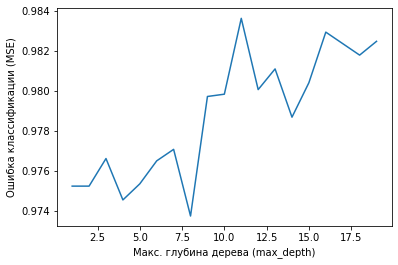

Оптимальные значения max_depth:  [8]


In [32]:
from sklearn.model_selection import cross_val_score

d_list = list(range(1,20))
cv_scores = []
for d in d_list:
    tree = DecisionTreeClassifier(max_depth=d, 
                                  random_state=21, 
                                  max_features=2)
    scores = cross_val_score(tree, X, y, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

MSE = [1-x for x in cv_scores]

plt.plot(d_list, MSE)
plt.xlabel('Макс. глубина дерева (max_depth)');
plt.ylabel('Ошибка классификации (MSE)')
plt.show()

d_min = min(MSE)

all_d_min = []
for i in range(len(MSE)):
    if MSE[i] <= d_min:
        all_d_min.append(d_list[i])

print('Оптимальные значения max_depth: ', all_d_min)

In [33]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn import tree

dtc = DecisionTreeClassifier(max_depth=10, random_state=21, max_features=2)

tree_params = { 'max_depth': range(1,20), 'max_features': range(1,4) }
tree_grid = GridSearchCV(dtc, tree_params, cv=10, verbose=True, n_jobs=-1)
tree_grid.fit(X, y)

print('\n')
print('Лучшее сочетание параметров: ', tree_grid.best_params_)
print('Лучшие баллы cross validation: ', tree_grid.best_score_)

Fitting 10 folds for each of 57 candidates, totalling 570 fits


Лучшее сочетание параметров:  {'max_depth': 3, 'max_features': 1}
Лучшие баллы cross validation:  0.028686635944700466


In [34]:
from sklearn.tree import DecisionTreeClassifier  # Импортируем модель

# Создаем модель с оптимальными параметрами
model = DecisionTreeClassifier(max_depth=3, max_features=1)

# Обучаем модель на вашем наборе данных (X_train, y_train - ваши признаки и целевая переменная)
model.fit(X_train, y_train)

# Теперь у вас есть обученная модель, которую вы можете использовать для прогнозирования

DecisionTreeClassifier(max_depth=3, max_features=1)

In [35]:
from sklearn.tree import export_graphviz

# Generate a graphical representation of the tree and save it as a .dot file
export_graphviz(tree_grid.best_estimator_,
                out_file='./tree.dot',  # Specify the path where you want to save the .dot file
                feature_names=X.columns,
                class_names=y.unique().astype(str),  # Convert class names to strings
                filled=True,
                rounded=True)

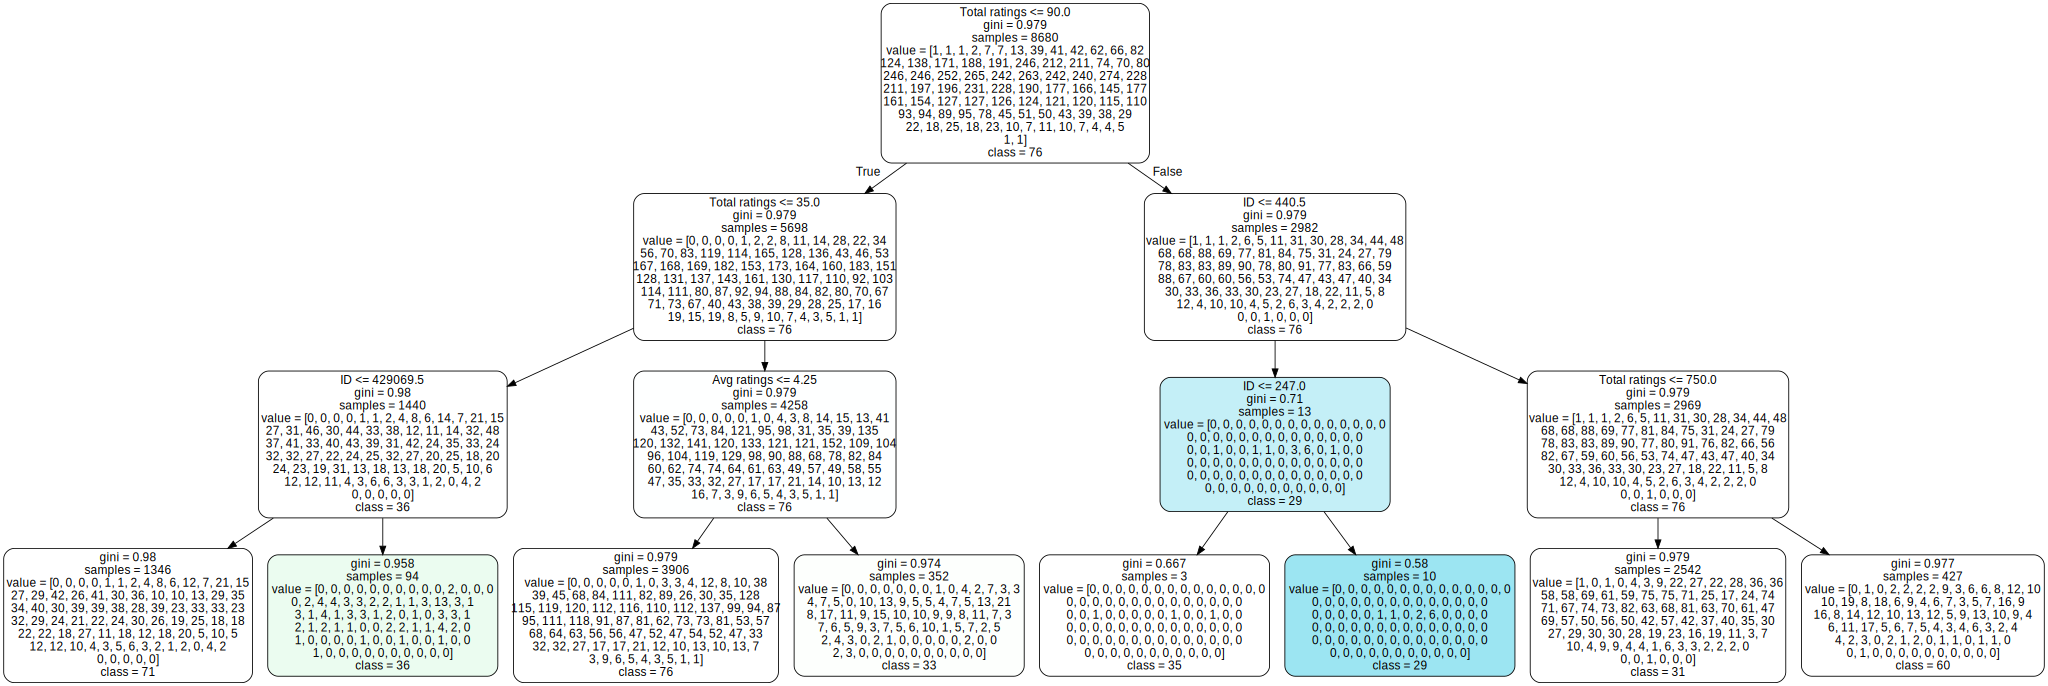

In [36]:
import graphviz

with open('./tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

IndexError: list index out of range

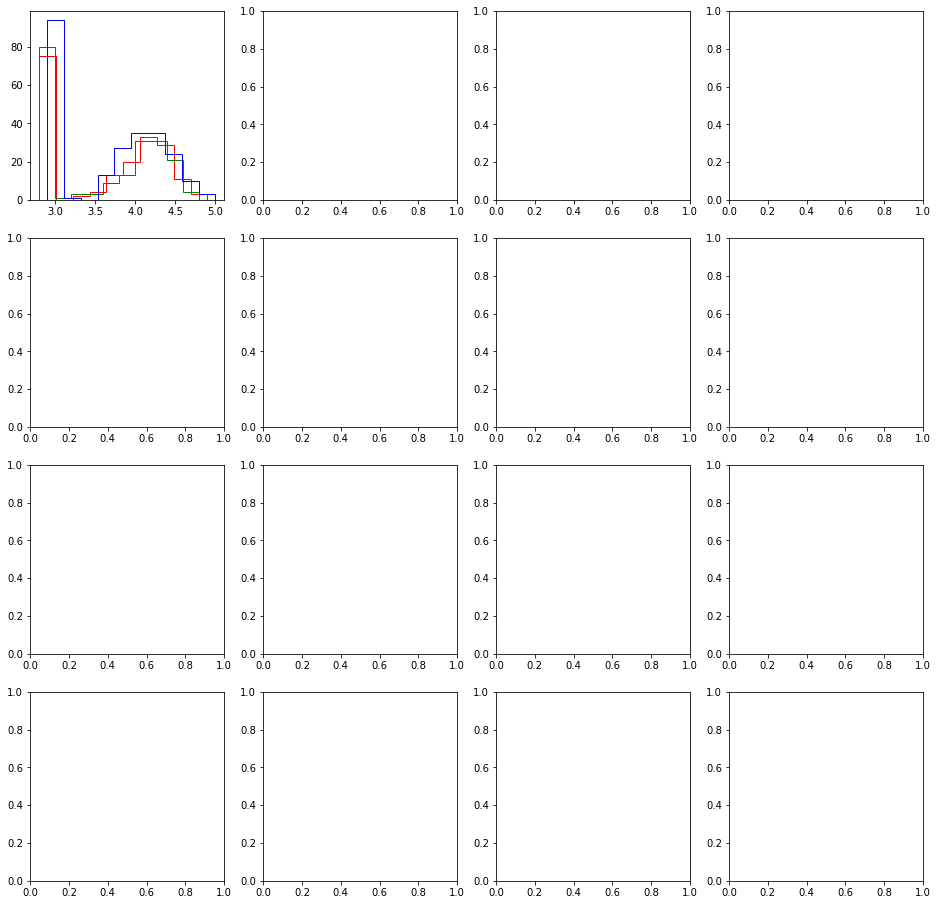

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

answers = y.unique()
colors = ['r', 'g', 'b']
markers = ['*', '^', 'o']

# Create subplots for each pair of features
f, places = plt.subplots(4, 4, figsize=(16, 16))

fmin = X.min() - 0.5
fmax = X.max() + 0.5
plot_step = 0.02

# Iterate over subplot rows and columns
for i in range(4):
    for j in range(4):
        if i == j:
            for id_answer in range(len(answers)):
                idx = np.where(y == answers[id_answer])
                places[i, j].hist(X.iloc[idx].iloc[:, i], color=colors[id_answer], histtype='step')
        else:
            xx, yy = np.meshgrid(np.arange(fmin[i], fmax[i], plot_step),
                                np.arange(fmin[j], fmax[j], plot_step))
            model = DecisionTreeClassifier(max_depth=3, random_state=21, max_features=2)
            model.fit(X.iloc[:, [i, j]].values, y)
            p = model.predict(np.c_[xx.ravel(), yy.ravel()])
            p = p.reshape(xx.shape)
            p[p == answers[0]] = 0
            p[p == answers[1]] = 1
            p[p == answers[2]] = 2
            xx = xx.astype(np.float32)
            yy = yy.astype(np.float32)
            p = p.astype(np.float32)
            places[i, j].contourf(xx, yy, p, cmap='Pastel1')

            for id_answer in range(len(answers)):
                idx = np.where(y == answers[id_answer])
                places[i, j].plot(X.iloc[idx].iloc[:, i], X.iloc[idx].iloc[:, j],
                                  colors[id_answer] + markers[id_answer], label=answers[id_answer], markersize=6)

        if j == 0:
            places[i, j].set_ylabel(X.columns[j])

        if i == 3:
            places[i, j].set_xlabel(X.columns[i])

# Adjust spacing between subplots
plt.tight_layout()
plt.show()


In [ ]:
# Введите значения признаков с клавиатуры
price = input('Введите цену (Price): ')
avg_ratings = input('Введите средний рейтинг (Avg ratings): ')
total_ratings = input('Введите общее количество рейтингов (Total ratings): ')
food_type = input('Введите типы кухни (Food type): ')
address = input('Введите адрес (Address): ')
delivery_time = input('Введите время доставки (Delivery time): ')

# Создайте словарь с введенными значениями признаков (остальные оставьте пустыми)
user_data = {
    "Price": float(price) if price else None,
    "Avg ratings": float(avg_ratings) if avg_ratings else None,
    "Total ratings": int(total_ratings) if total_ratings else None,
    "Food type": food_type,
    "Address": address,
    "Delivery time": int(delivery_time) if delivery_time else None
}

# Создайте массив с значениями признаков
X_new = np.array([[user_data["Price"], user_data["Avg ratings"], user_data["Total ratings"], user_data["Delivery time"]]])

# Получение ответа для новых введенных данных
target = dtc.predict(X_new)[0]

print('\nДанный ресторан относится к классу: ', target)


Введите цену (Price): 1
Введите средний рейтинг (Avg ratings): 1
Введите общее количество рейтингов (Total ratings): 1
